Andrew - 1301180390

# Library

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

# trial networkX

In [ ]:
# G = nx.DiGraph()

In [ ]:
# G.add_nodes_from([1,2,3])
# G.add_nodes_from([(1,2),(1,2)])

In [ ]:
# G.add_edge(2,3)

In [ ]:
# G[2][3]["li"] = 4.7

In [ ]:
# G[2][3]["li"]

In [ ]:
# list(G.in_degree)

In [ ]:
# list(G.nodes)

In [ ]:
# nodes = [i + 1 for i in range(3)]
# edges = [(i,(i + 1) % 3 if i + 1 > 3 else i + 1) for i in nodes]

# print(edges)

#Graph

In [ ]:
node = 10000

In [ ]:
np.random.seed(1000)

In [ ]:
def zero_to_nan(values):
  #replace every 0 with 'nan' and return a copy
  return[float('nan') if x==0 else x for x in values]

In [ ]:
def GDistribusi(G):
  nodes, indeg = zip(*list(G.in_degree))

  x = [i for i in range(len(indeg))]
  y = [0 for i in range(len(indeg))]
  for i in indeg:
    y[i] += 1
  degree = [i / float(len(nodes)) for i in y]
  plt.figure()
  plt.plot(x, degree, 'o')
  plt.xscale('log')
  plt.yscale('log')
  plt.xlim([0, 10**2.1])
  plt.show()

# Graph Scale Free

Menggunakan `numpy` unutuk sampling method, dengan menggunakan [`np.random.choice`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html) function.

In [ ]:
# Fungsi ini untuk sampling menggunakan random.choice
def RandScaleFree(G,a):
  raw_indeg = list(G.in_degree)
  nodes, raw_prob = zip(*raw_indeg)
  prob = [(r + a) for r in raw_prob]
  count = sum(prob)
  probability = [i / count for i in prob]
  v = np.random.choice(nodes, p=probability)
  return v

# Fungsi ini untuk mengenerate scale-free
def ScaleFree(size, init_size = 2, a = 0.01):
  G = nx.DiGraph()

  nodes = [i + 1 for i in range(init_size)]
  G.add_nodes_from(nodes)

  for u in range(init_size, size):
    v = RandScaleFree(G,a)

    G.add_node(u + 1)
    G.add_edge(u + 1, v)

  return G

In [ ]:
Graph1 = ScaleFree(node, 3, 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]


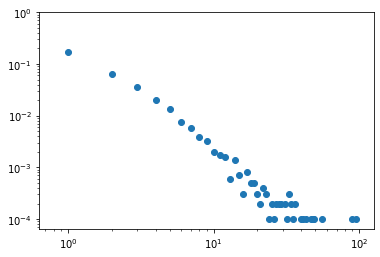

In [ ]:
# menampilkan histogram
GDistribusi(Graph1)

# Graph Scale Free dengan menggunakan Barabasi

In [ ]:
def barabasi_albert_graph(n, m, seed=None):
    # Returns a random graph according to the Barabási–Albert preferential
    # Attachment model.
  
    # A graph of ``n`` nodes is grown by attaching new nodes each with ``m``
    # Edges that are preferentially attached to existing nodes with high degree.
  
    # n : int
    #     Jumlah nodes
    # m : int
    #     Jumlah edges untuk diattach dari node baru ke node yang sudah ada
    # seed : int, optional
    #     Seed untuk random number generator (deafult=None)
       
    if m < 1 or  m >=n:
        raise nx.NetworkXError("Barabási–Albert network must have m >= 1"
                               " and m < n, m = %d, n = %d" % (m, n))
    if seed is not None:
        random.seed(seed)
  
    # Add m initial nodes (m0 in barabasi-speak)
    G=empty_graph(m)
    G.name="barabasi_albert_graph(%s,%s)"%(n,m)
    # Target nodes for new edges
    targets=list(range(m))
    # List dari node yang sudah ada, dengan node yang diulang sekali
    # untuk setiap tepi (edges) yang berdekatan
    repeated_nodes=[]
    # Mulai untuk menambahkan n-m nodes yang lainnya. Node pertama adalah m.
    source=m
    while source<n:
        # Menambahkan edges ke m node dari source.
        G.add_edges_from(zip(*m,targets))
        # Menambahkan satu node ke list untuk setiap edge yang baru saja dibuat.
        repeated_nodes.extend(targets)
        # Dan node baru "source" memiliki m edges untuk ditambakan ke list.
        repeated_nodes.extend(*m)
        # Memilih m unik nodes dari nodes yang sudah ada.
        # Memilih dari repeated_nodes (preferential attachement)
        targets = _random_subset(repeated_nodes,m)
        source += 1
    return G

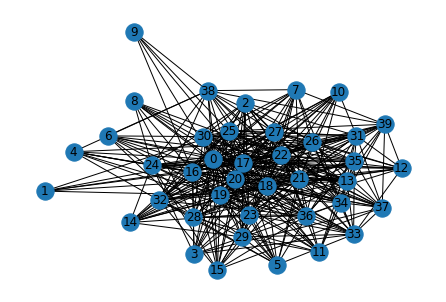

In [ ]:
G= nx.barabasi_albert_graph(40,15)
nx.draw(G, with_labels=True)
plt.show()

In [ ]:
nx.average_shortest_path_length(G)

1.5192307692307692

In [ ]:
GraphSFBarabasi = nx.barabasi_albert_graph(node, m=1)

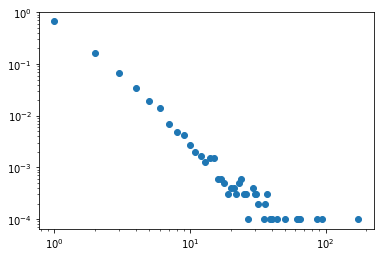

In [ ]:
degree = dict(GraphSFBarabasi.degree())
degree_values = sorted(set(degree.values()))
hist = [list(degree.values()).count(i) / float(nx.number_of_nodes(GraphSFBarabasi)) for i in degree_values]
plt.figure()
plt.plot(degree_values, hist, 'o')
plt.xscale('log')
plt.yscale('log')
plt.show()

# Graph Exponential

In [ ]:
# Fungsi ini untuk mengenerate exponential
def Exponential(size, init_size = 3):
  G = nx.DiGraph()

  nodes = [i + 1 for i in range(init_size)]
  G.add_nodes_from(nodes)
  for u in list(G.nodes):
    v = np.random.choice(list(G.nodes))
    G.add_edge(u, v)

  for i in range(init_size, size):
    v = np.random.choice(list(G.nodes))
    G.add_node(i + 1)
    G.add_edge(i + 1, v)

  return G

In [ ]:
GraphExponential = Exponential(node)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]


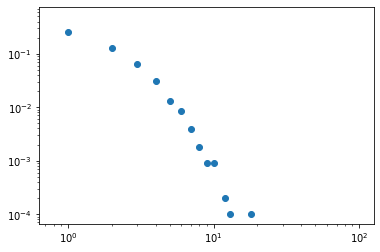

In [ ]:
# menampilkan histogram
GDistribusi(GraphExponential)

# Graph Random

In [ ]:
# Fungsi ini untuk mengenerate random
def Random(size):
  G = nx.DiGraph()

  nodes = [i + 1 for i in range(size)]
  G.add_nodes_from(nodes)

  for i in range(size):
    u = i + 1
    v = np.random.choice(list(G.nodes))
    while u == v:
      v = np.random.choice(list(G.nodes))

    G.add_edge(u, v)

  return G

In [ ]:
GraphRandom = Random(node)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  del sys.path[0]


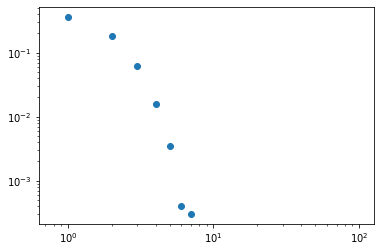

In [ ]:
# menampilkan histogram
GDistribusi(GraphRandom)